# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [3]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


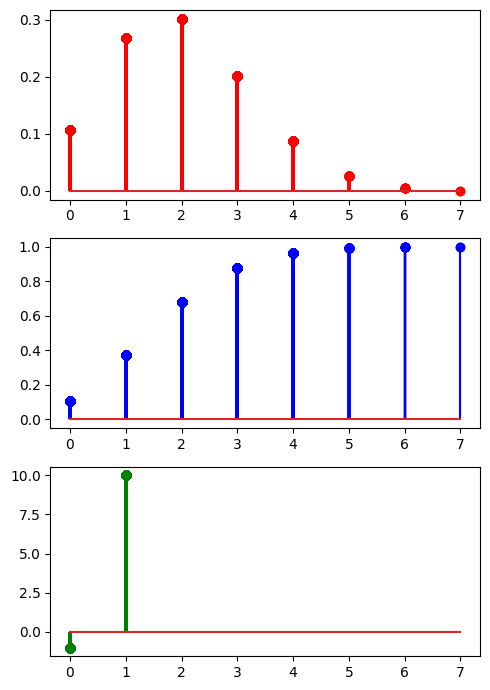

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [20]:
# TODO
from scipy.stats import norm

def dnorm(x, mean, sd):
    result = norm.pdf(x, loc = mean, scale = sd)
    return result

def pnorm(q, mean, sd):
    result = norm.cdf(q, loc = mean, scale = sd)
    return result

def qnorm(p, mean, sd):
    result = norm.ppf(p, loc = mean, scale = sd)
    return result

def rnorm(n, mean, sd):
    result = norm.rvs(loc = mean, scale = sd, size = n)
    return result

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

mean = 50
sd = 5
data = rnorm(2000, mean, sd)
sorted_data = np.sort(data)
pdf = dnorm(sorted_data, mean, sd)
cdf = pnorm(sorted_data, mean, sd)
print(sorted_data)

[34.23321275 34.7311781  34.91984007 ... 66.60539378 67.16331716
 69.79301352]


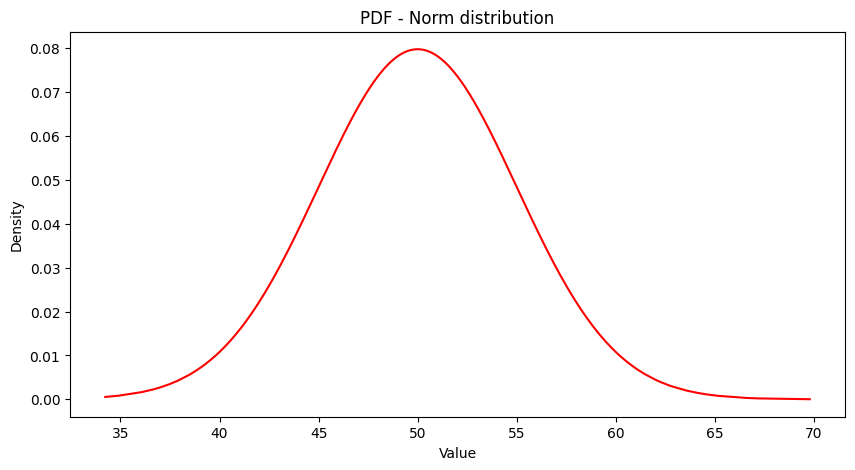

In [22]:
plt.figure(figsize = (10, 5))
plt.plot(sorted_data, pdf, "r-")
plt.title("PDF - Norm distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

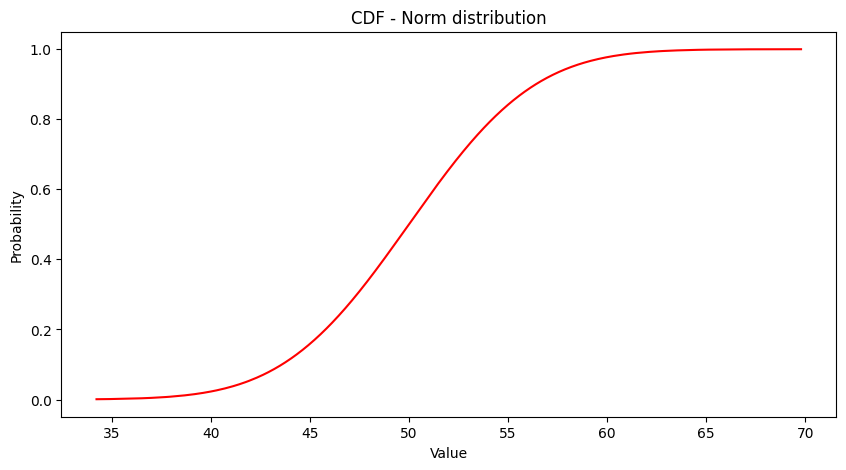

In [23]:
plt.figure(figsize = (10, 5))
plt.plot(sorted_data, cdf, "r-")
plt.title("CDF - Norm distribution")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

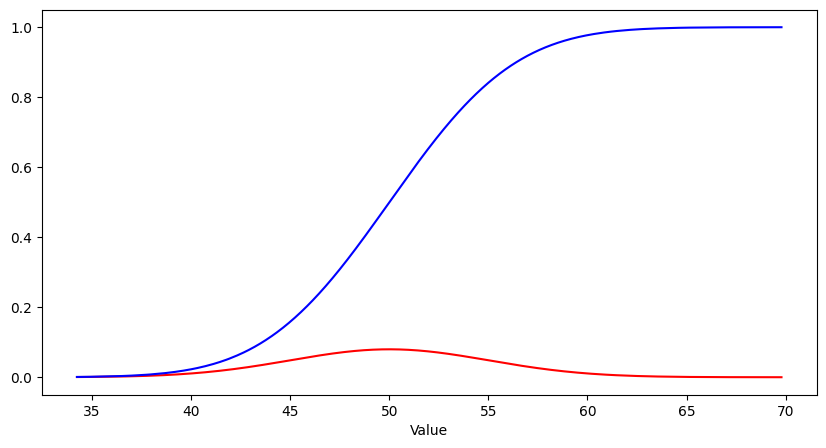

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(sorted_data, pdf, "r-")
plt.plot(sorted_data, cdf, "b-")
plt.xlabel("Value")
plt.show()

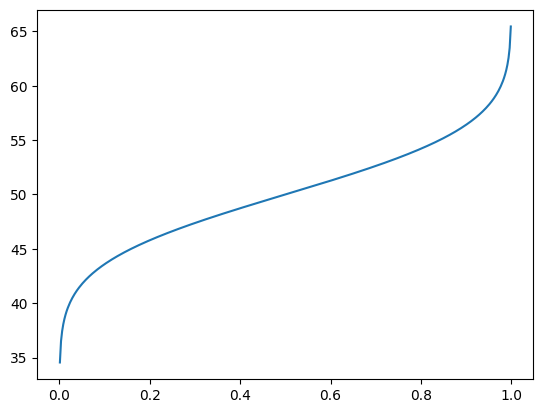

In [25]:
p = np.linspace(0.001, 0.999, 400)
ppf = qnorm(p, mean, sd)
plt.plot(p, ppf)

*UNIFORM DISTRIBUTION*


In [26]:
from scipy.stats import uniform

def dunif(x, a, b):
    return uniform.pdf(x, loc=a, scale=b-a)

def punif(q, a, b):
    return uniform.cdf(q, loc=a, scale=b-a)

def qunif(p, a, b):
    return uniform.ppf(p, loc=a, scale=b-a)

def runif(n, a, b):
    return uniform.rvs(loc=a, scale=b-a, size=n)

In [28]:
np.random.seed(2)

a=1
b=5

data= runif(2000, a, b)

In [29]:
x= np.linspace(a-1, b+1, 400)

pdf= dunif(x,a,b)
cdf= punif(x,a,b)

p= np.linspace(0.001, 0.999, 400)
ppf= qunif(p,a,b)

**Histogram + PDF**

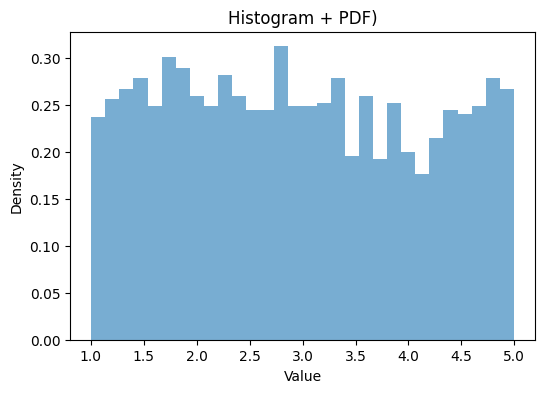

In [46]:
plt.figure(figsize=(6, 4))

plt.hist(data, bins=30, density=True, alpha= 0.6)
plt.plot()

plt.title("Histogram + PDF)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

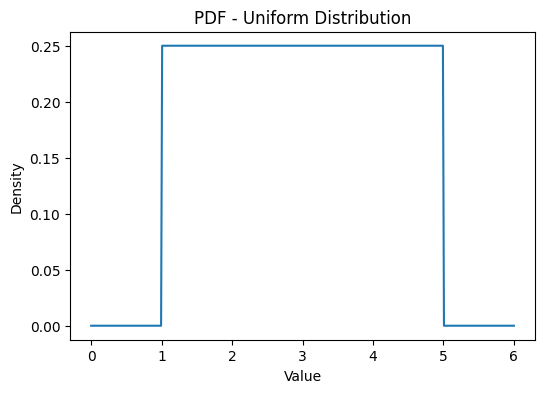

In [47]:
plt.figure(figsize=(6, 4))

plt.plot(x, pdf)

plt.title("PDF - Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

plt.show()

**CDF**


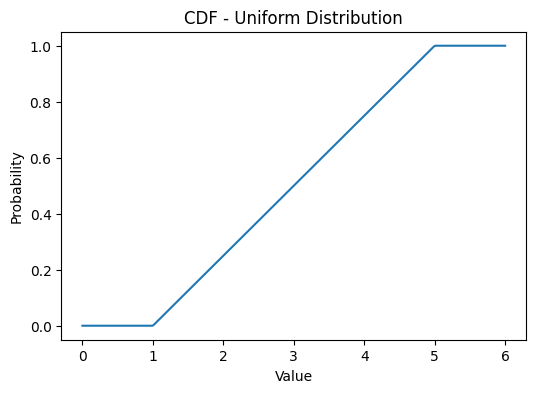

In [48]:
plt.figure(figsize=(6,4))
plt.plot(x, cdf)

plt.title("CDF - Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Probability")

plt.show()

**PPF**

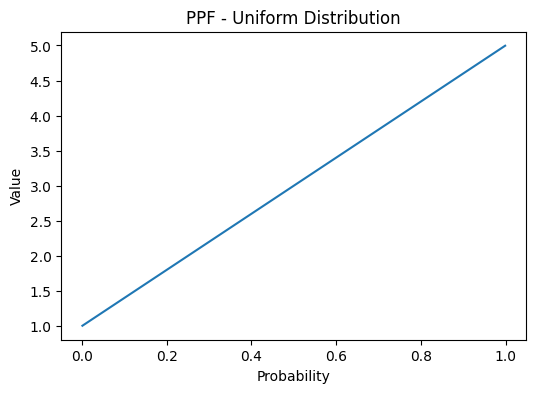

In [49]:
plt.figure(figsize=(6, 4))

plt.plot(p, ppf)

plt.title("PPF - Uniform Distribution")
plt.xlabel("Probability")
plt.ylabel("Value")

plt.show()